# Data Preparation

### Import All the Important Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the Dataset

In [2]:
df = pd.read_csv('./StudentsPerformance.csv')

### Display the Starting Rows

In [3]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


### Inspect and Clean the Data

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


### Encode Categorical Variables

In [5]:
# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

### Feature Scaling

In [6]:
# Standardize the feature columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('math score', axis=1))

# Classification Analysis

## Prepare the Data

In [7]:
# Create target variable: 1 if above average, 0 if below
df['above_avg_math'] = (df['math score'] > df['math score'].mean()).astype(int)

# Split the data
X = df.drop(['math score', 'above_avg_math'], axis=1)
y = df['above_avg_math']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train a Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       157
           1       0.86      0.84      0.85       143

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# Clustering Analysis

## Prepare the Data

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features
X_cluster = df[['math score', 'reading score', 'writing score']]

# Standardize the features
X_cluster_scaled = scaler.fit_transform(X_cluster)

## Determine Optimal Number of Clusters

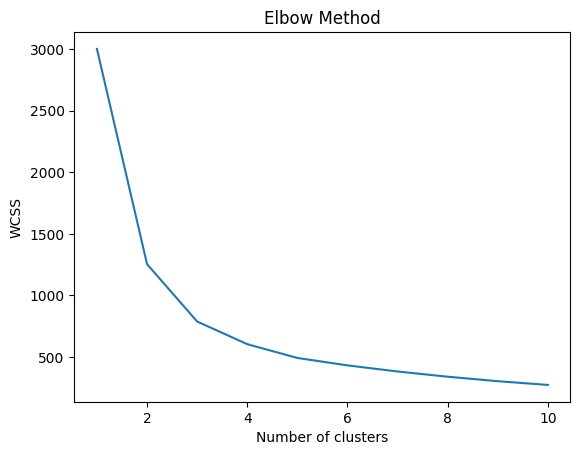

In [10]:
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Apply K-Means Clustering

In [11]:
# From the Elbow method, choose the optimal number of clusters, e.g., 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

## Visualize the Clusters

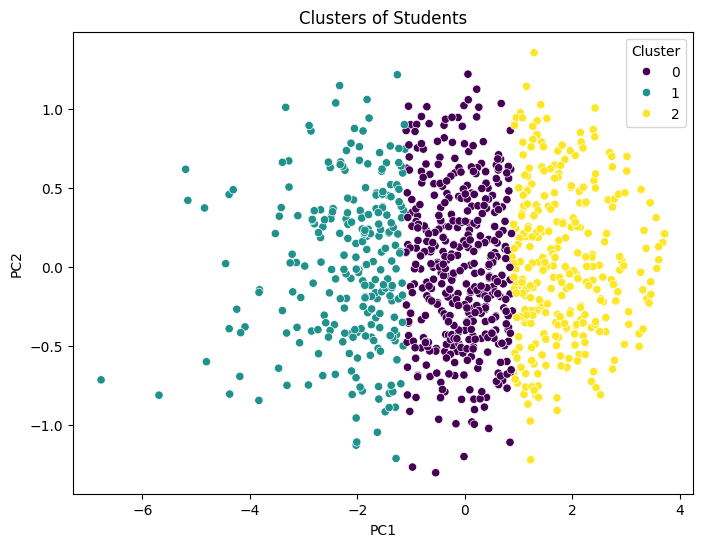

In [12]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_cluster_scaled)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.show()